In [5]:
from Bio.PDB import PDBParser
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Bloque 3 - Extraer pLDDT del PDB


En este apartado se analiza la calidad del modelo estructural predicho por AlphaFold a partir de los valores
de pLDDT almacenados en el campo B-factor del archivo PDB. Estos valores proporcionan una estimación de la
confianza local de la predicción estructural para cada residuo de la proteína.

En primer lugar, se carga el archivo PDB correspondiente al modelo AlphaFold de la beta-2-microglobulina
utilizando el módulo `Bio.PDB`. La estructura se recorre jerárquicamente para acceder a modelos, cadenas,
residuos y átomos.


In [2]:
pdb_path = "data/AF-P61769-F1-model_v6.pdb"

parser = PDBParser(QUIET=True)
structure = parser.get_structure("B2M", pdb_path)

plddt_por_residuo = defaultdict(list)

for model in structure:
    for chain in model:
        for residue in chain:
            # Ignorar heteroátomos (agua, etc.)
            if residue.id[0] != " ":
                continue

            residuo_id = (chain.id, residue.id[1])

            for atom in residue:
                plddt = atom.get_bfactor()
                plddt_por_residuo[residuo_id].append(plddt)

Dado que cada residuo contiene múltiples átomos, se asigna un único valor de pLDDT por residuo calculando
el promedio de los valores de sus átomos. Esto permite evaluar la confianza estructural a nivel de residuo.


In [3]:
plddt_residuos = {
    residuo: np.mean(valores)
    for residuo, valores in plddt_por_residuo.items()
}

plddt_values = list(plddt_residuos.values())

In [4]:
plddt_medio = np.mean(plddt_values)

residuos_alta_confianza = [
    v for v in plddt_values if v > 70
]

porcentaje_alta_confianza = (
    len(residuos_alta_confianza) / len(plddt_values)
) * 100

print(f"Número total de residuos analizados: {len(plddt_values)}")
print(f"pLDDT medio de la estructura: {plddt_medio:.2f}")
print(f"Porcentaje de residuos con pLDDT > 70: {porcentaje_alta_confianza:.2f}%")

Número total de residuos analizados: 119
pLDDT medio de la estructura: 94.04
Porcentaje de residuos con pLDDT > 70: 94.12%


### Conclusión

El análisis de los valores de pLDDT muestra que el modelo estructural predicho por AlphaFold para la
beta-2-microglobulina presenta una calidad global muy alta. El pLDDT medio obtenido (94.04) se sitúa dentro
del rango asociado a predicciones altamente fiables, y más del 94 % de los residuos presentan valores de
pLDDT superiores a 70.

Estos resultados indican que la estructura tridimensional generada es robusta y adecuada para análisis
estructurales posteriores, como la visualización detallada de la proteína o el estudio de la relación
estructura-función.


### Bloque 4 – Representación gráfica del pLDDT por residuo

En este bloque se representa gráficamente la calidad de la predicción estructural obtenida con AlphaFold
mediante un gráfico lineal de los valores de pLDDT por residuo. Este tipo de representación permite evaluar
cómo varía la confianza de la predicción a lo largo de la secuencia de la proteína e identificar regiones
estructuralmente más estables o potencialmente más flexibles.

A partir de los valores de pLDDT calculados en el bloque anterior, se ordenan los residuos según su posición
en la secuencia y se construyen los vectores necesarios para la representación gráfica. El eje X representa
el índice del residuo, mientras que el eje Y corresponde al valor de pLDDT asignado a cada residuo.

In [6]:
residuos_ordenados = sorted(plddt_residuos.keys(), key=lambda x: x[1])

residue_indices = [res[1] for res in residuos_ordenados]

plddt_por_residuo_ordenado = [
    plddt_residuos[res] for res in residuos_ordenados
]

Se genera un gráfico lineal en el que cada punto representa el valor de pLDDT de un residuo. Además, se añade
una línea horizontal en pLDDT = 70, que actúa como umbral de referencia para distinguir visualmente las regiones
predichas con alta confianza de aquellas con menor fiabilidad.

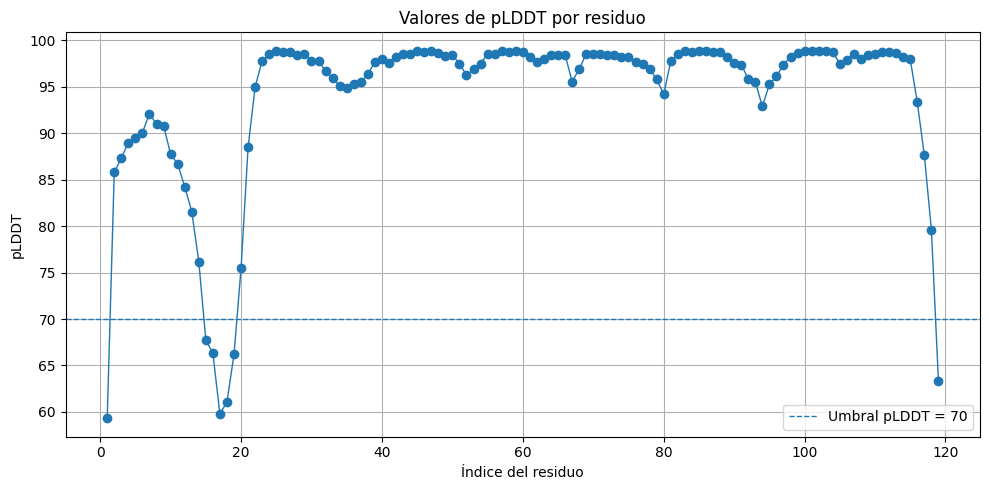

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(
    residue_indices,
    plddt_por_residuo_ordenado,
    marker='o',
    linewidth=1
)

plt.axhline(
    y=70,
    linestyle='--',
    linewidth=1,
    label='Umbral pLDDT = 70'
)

plt.xlabel("Índice del residuo")
plt.ylabel("pLDDT")
plt.title("Valores de pLDDT por residuo")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Interpretación del gráfico pLDDT por residuo

El gráfico de pLDDT por residuo muestra que la mayor parte de la secuencia presenta valores de pLDDT muy elevados,
generalmente por encima de 90 y claramente superiores al umbral de 70, lo que indica una **alta confianza en la
predicción estructural** a lo largo de casi toda la proteína.

Las regiones comprendidas aproximadamente entre los residuos 25 y 110 presentan valores de pLDDT cercanos a 95–99,
lo que sugiere que estas zonas corresponden al **núcleo estructural más estable** de la proteína. Este comportamiento
es coherente con la presencia de un plegamiento tipo inmunoglobulina bien definido, característico de la
beta-2-microglobulina.

Por el contrario, se observa una disminución clara de los valores de pLDDT en los **extremos de la secuencia**,
especialmente en los primeros residuos (región N-terminal) y en los últimos residuos (región C-terminal), donde
los valores llegan a situarse por debajo del umbral de 70. Estas regiones probablemente corresponden a zonas más
flexibles o menos estructuradas, lo cual es habitual en los extremos de proteínas globulares.

El gráfico confirma que el modelo predicho por AlphaFold es **altamente fiable en la mayor parte de la
secuencia**, mientras que las regiones con menor pLDDT se concentran en zonas específicas asociadas a mayor
flexibilidad conformacional.
